In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from math import radians,cos,sin,asin,sqrt

In [2]:
os.getcwd()

'C:\\Users\\pajag\\Computer_Lab_1'

In [3]:
data = pd.read_csv('C:\\Users\\pajag\\Computer_Lab_1\\uber.csv')

In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
data = data.drop('Unnamed: 0',axis=1)

In [7]:
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [8]:
data.shape

(200000, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [10]:
data.isnull().sum().sort_values(ascending=False)

dropoff_longitude    1
dropoff_latitude     1
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
passenger_count      0
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum().sort_values(ascending=False)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [14]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


In [15]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [16]:
data = data.drop(['key','pickup_datetime'],axis =1)

In [17]:
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
def distance(lon1,lat1,lon2,lat2):
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 -lat1
    
    a = np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2* np.arcsin(np.sqrt(a))
    r = 6371
    
    return(c*r)

In [19]:
distance(2,3,4,5)

314.1158085405353

In [20]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [21]:
pickup_longitude = data['pickup_longitude']
pickup_latitude = data['pickup_latitude']
dropoff_longitude = data['dropoff_longitude']
dropoff_latitude = data['dropoff_latitude']

In [22]:
data['Distance'] = distance(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude)

In [23]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [46]:
x=data[['Distance','passenger_count']]
y=data['fare_amount']

In [47]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=10)

In [48]:
model_LinearRegression = LinearRegression()

In [49]:
model_LinearRegression.fit(x,y)

LinearRegression()

In [50]:
pred = model_LinearRegression.predict(x)

In [51]:
r2_score(y,pred)

0.7653717757956617

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

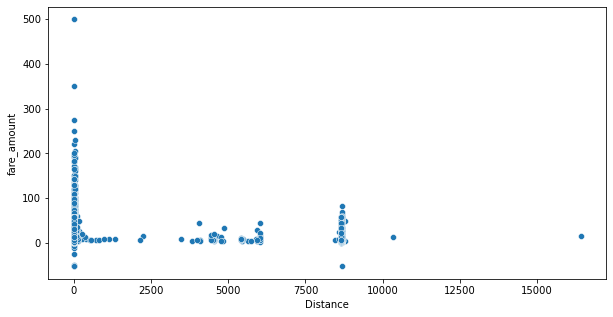

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Distance',y='fare_amount',data=data)

In [54]:
data.drop(data[data['Distance']>60].index, inplace=True)
data.drop(data[data['Distance']==0].index, inplace = True)
data.drop(data[data['fare_amount']==0].index, inplace = True)
data.drop(data[data['fare_amount']<0].index,inplace = True)
data.shape

(193830, 7)

In [55]:
data.drop(data[(data['fare_amount']>100) & (data['Distance']<1)].index, inplace=True)
data.drop(data[(data['fare_amount']<1) & (data['Distance']>100)].index, inplace=True)

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

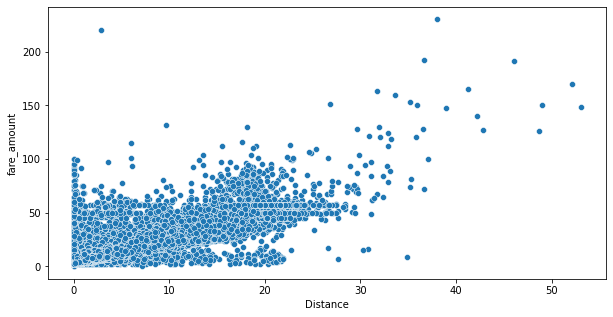

In [56]:
plt.figure(figsize=(10,5))
sns.color_palette("Set2")
sns.scatterplot(x='Distance',y='fare_amount',data=data)